
--- Filter Options ---


Enter the minimum price (INR) (or leave blank for no minimum):  15000
Enter the maximum price (INR) (or leave blank for no maximum):  30000



Available Brands:
1. Apple
2. Moto
3. Nothing
4. OnePlus
5. Oppo
6. Realme
7. Redmi
8. Samsung
9. Vivo
10. iQOO


Enter the numbers of the brands you want to filter by (comma-separated, or leave blank for all):  



--- Filtered Data ---
      Brand                              Model Price Range (INR)  \
5      Moto                Moto G Power (2025)     10000 - 20000   
10    Redmi               Redmi Note 13 Pro 5G     20001 - 30000   
11   Realme                   Realme 12 Pro 5G     20001 - 30000   
12  Samsung                      Galaxy A16 5G     20001 - 30000   
13     Oppo                     Oppo A3 Pro 5G     20001 - 30000   
14     Vivo                       Vivo Y200 5G     20001 - 30000   
15  OnePlus                        Nord N30 SE     20001 - 30000   
16     Moto                        Moto G84 5G     20001 - 30000   
17     iQOO                         iQOO Z9 5G     20001 - 30000   
18    Redmi                   Redmi Note 13 5G     20001 - 30000   
19   Realme                   Realme 11 Pro 5G     20001 - 30000   
20  Samsung                      Galaxy A25 5G     20001 - 30000   
21     Oppo                   Oppo F27 Pro+ 5G     20001 - 30000   
22     Vivo              


Would you like to visualize the (f)iltered data or (a)ll data? (f/a):  f


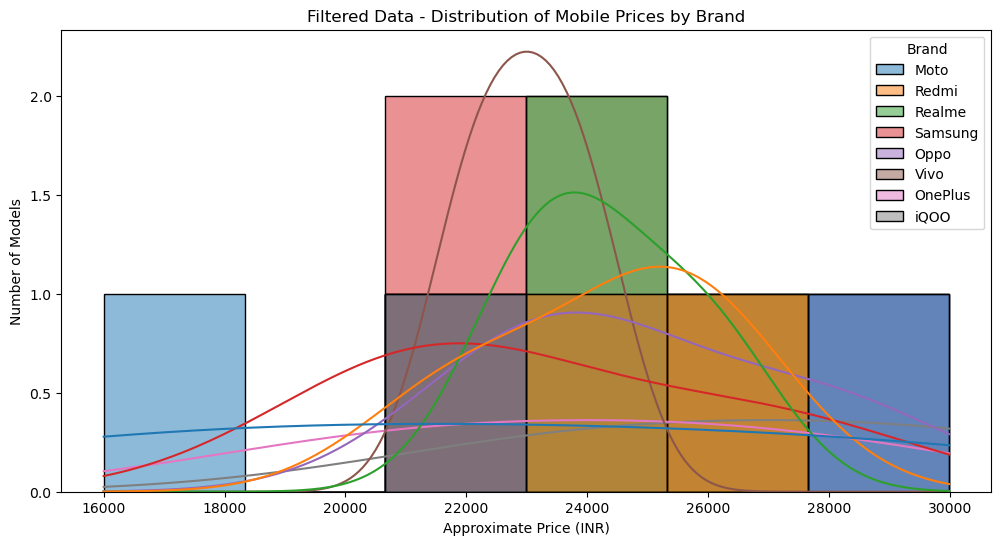

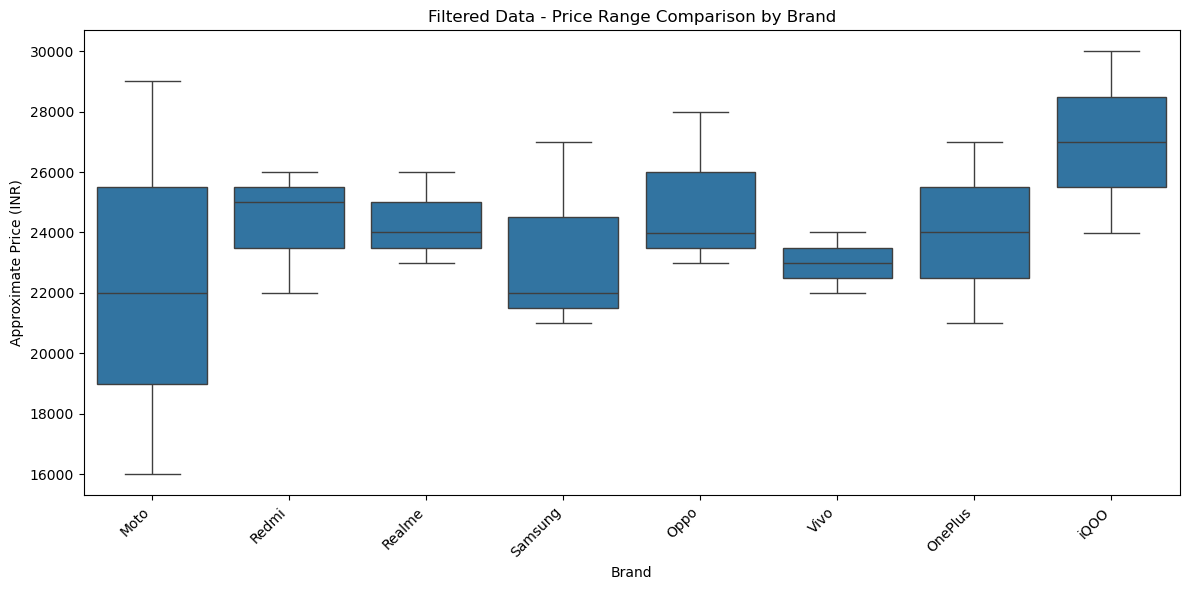

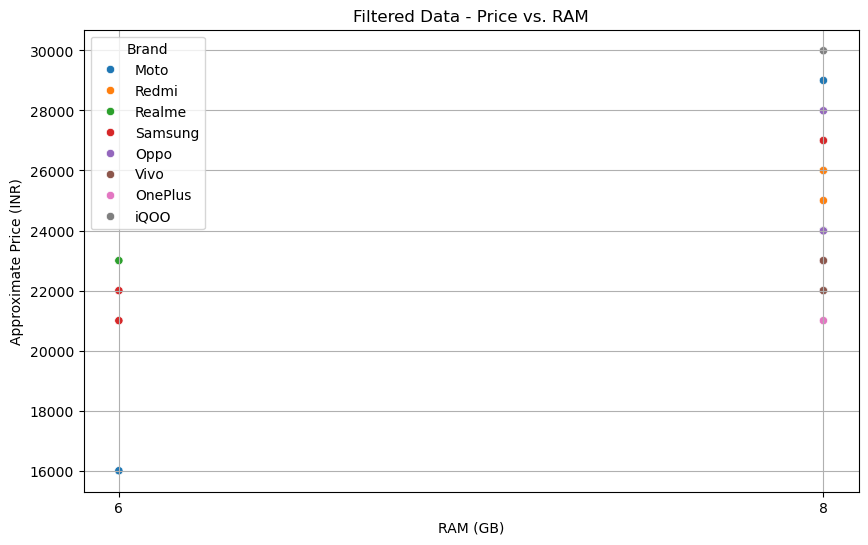

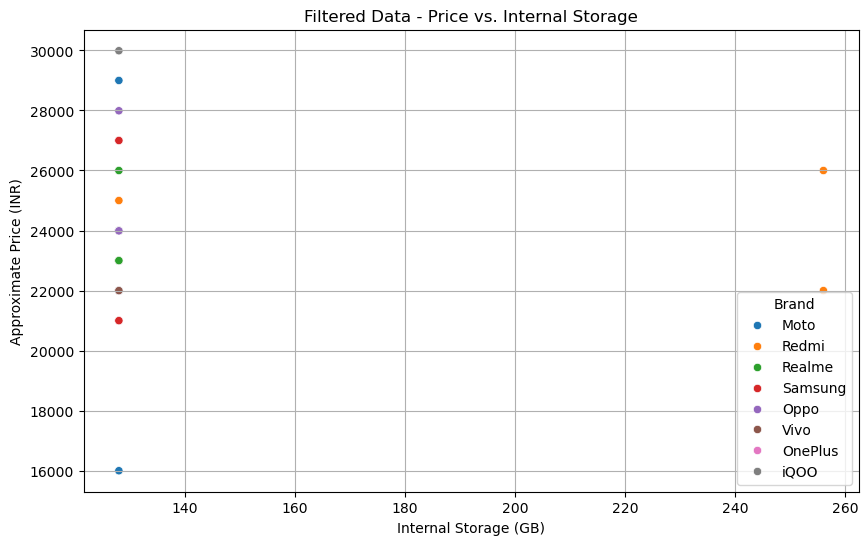

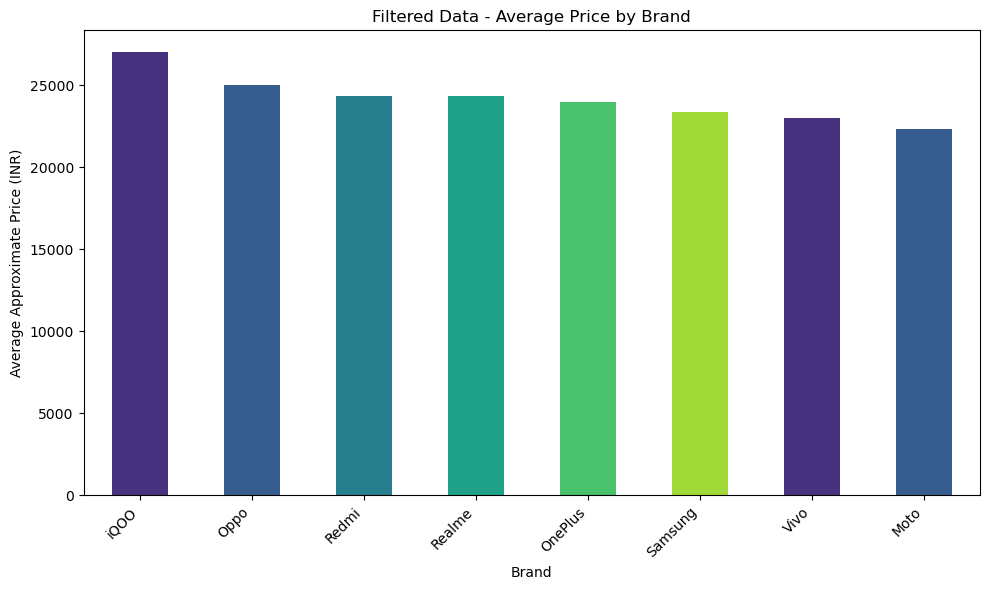

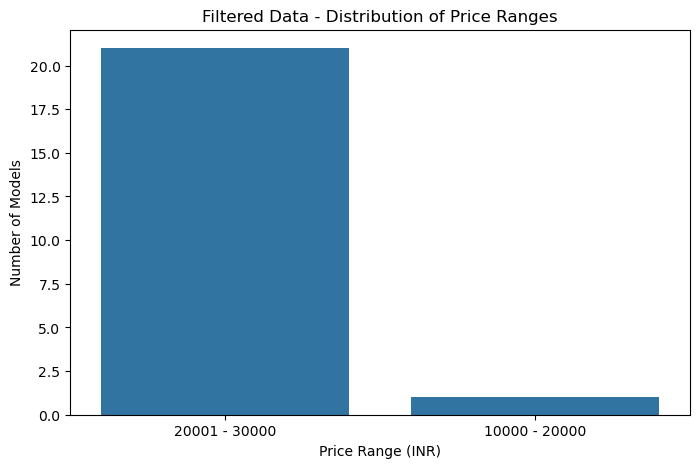

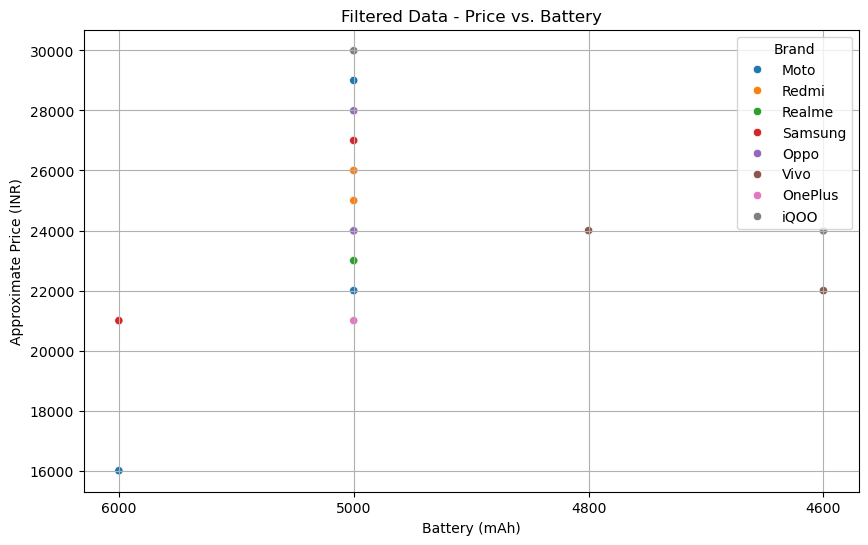

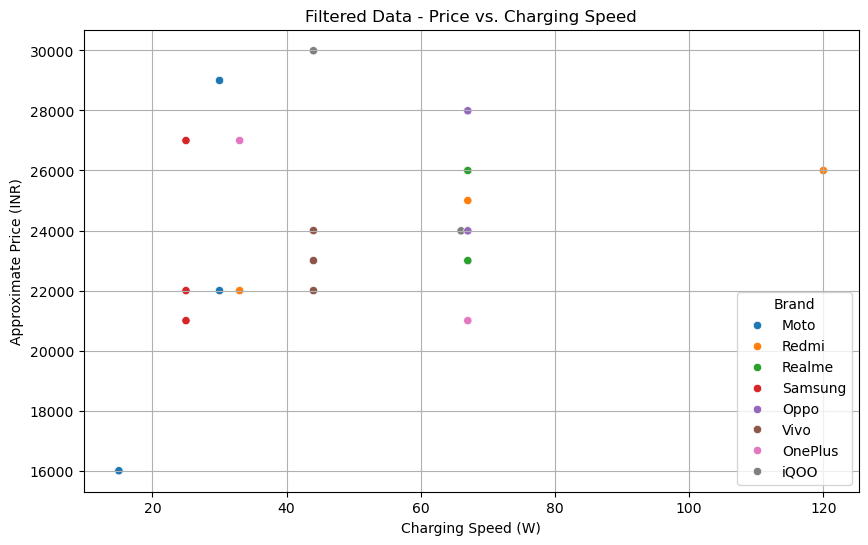

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(filename='/home/marudhu_3021/Downloads/mobile_prices.csv'):
    """Loads the mobile price data from a CSV file."""
    try:
        df = pd.read_csv(filename)
        return df
    except FileNotFoundError:
        print(f"Error: '{filename}' not found. Please make sure the file is in the correct directory.")
        return None

def get_price_range():
    """Gets the price range filter from the user."""
    min_price_str = input("Enter the minimum price (INR) (or leave blank for no minimum): ")
    max_price_str = input("Enter the maximum price (INR) (or leave blank for no maximum): ")

    min_price = None
    max_price = None

    if min_price_str.strip():
        try:
            min_price = float(min_price_str)
        except ValueError:
            print("Invalid minimum price entered. Skipping minimum price filtering.")

    if max_price_str.strip():
        try:
            max_price = float(max_price_str)
        except ValueError:
            print("Invalid maximum price entered. Skipping maximum price filtering.")

    return min_price, max_price

def get_brands(df):
    """Gets the brands to filter by from the user."""
    unique_brands = sorted(df['Brand'].unique())
    print("\nAvailable Brands:")
    for i, brand in enumerate(unique_brands):
        print(f"{i+1}. {brand}")

    selected_indices_str = input("Enter the numbers of the brands you want to filter by (comma-separated, or leave blank for all): ").strip()

    if selected_indices_str:
        try:
            selected_indices = [int(i.strip()) - 1 for i in selected_indices_str.split(',')]
            valid_indices = range(len(unique_brands))
            selected_brands = [unique_brands[i] for i in selected_indices if i in valid_indices]
            if selected_brands:
                print(f"Filtering by brands: {', '.join(selected_brands)}")
                return selected_brands
            else:
                print("Invalid brand selection. Showing all brands.")
                return None
        except ValueError:
            print("Invalid input. Showing all brands.")
            return None
    else:
        return None

def filter_data(df):
    """Filters the DataFrame based on user-specified criteria."""
    filtered_df = df.copy()

    print("\n--- Filter Options ---")

    # Filter by Price Range
    min_price, max_price = get_price_range()
    if min_price is not None:
        filtered_df = filtered_df[filtered_df['Exact Approx. Price (INR)'] >= min_price]
    if max_price is not None:
        filtered_df = filtered_df[filtered_df['Exact Approx. Price (INR)'] <= max_price]

    # Filter by Brand
    brands_to_filter = get_brands(df)
    if brands_to_filter:
        filtered_df = filtered_df[filtered_df['Brand'].isin(brands_to_filter)]

    if len(filtered_df) > 0:
        print("\n--- Filtered Data ---")
        print(filtered_df)
        return filtered_df
    else:
        print("\nNo data matching your filter criteria.")
        return None

def visualize_data(df_to_visualize, title_prefix=""):
    """Generates various visualizations for the given DataFrame."""
    if df_to_visualize is None or df_to_visualize.empty:
        print("No data to visualize.")
        return

    # Price Distribution by Brand
    plt.figure(figsize=(12, 6))
    sns.histplot(data=df_to_visualize, x='Exact Approx. Price (INR)', hue='Brand', kde=True)
    plt.title(f'{title_prefix}Distribution of Mobile Prices by Brand')
    plt.xlabel('Approximate Price (INR)')
    plt.ylabel('Number of Models')
    plt.show()

    # Price Range Comparison by Brand
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_to_visualize, x='Brand', y='Exact Approx. Price (INR)')
    plt.title(f'{title_prefix}Price Range Comparison by Brand')
    plt.xlabel('Brand')
    plt.ylabel('Approximate Price (INR)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Price vs. RAM
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_to_visualize, x='RAM (GB)', y='Exact Approx. Price (INR)', hue='Brand')
    plt.title(f'{title_prefix}Price vs. RAM')
    plt.xlabel('RAM (GB)')
    plt.ylabel('Approximate Price (INR)')
    plt.grid(True)
    plt.show()

    # Price vs. Internal Storage
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_to_visualize, x='Internal Storage (GB)', y='Exact Approx. Price (INR)', hue='Brand')
    plt.title(f'{title_prefix}Price vs. Internal Storage')
    plt.xlabel('Internal Storage (GB)')
    plt.ylabel('Approximate Price (INR)')
    plt.grid(True)
    plt.show()

    # Average Price by Brand
    average_price_by_brand = df_to_visualize.groupby('Brand')['Exact Approx. Price (INR)'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    average_price_by_brand.plot(kind='bar', color=sns.color_palette('viridis'))
    plt.title(f'{title_prefix}Average Price by Brand')
    plt.xlabel('Brand')
    plt.ylabel('Average Approximate Price (INR)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Price Range Distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_to_visualize, x='Price Range (INR)', order=df_to_visualize['Price Range (INR)'].value_counts().index)
    plt.title(f'{title_prefix}Distribution of Price Ranges')
    plt.xlabel('Price Range (INR)')
    plt.ylabel('Number of Models')
    plt.show()

    # Battery vs. Price
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_to_visualize, x='Battery (mAh)', y='Exact Approx. Price (INR)', hue='Brand')
    plt.title(f'{title_prefix}Price vs. Battery')
    plt.xlabel('Battery (mAh)')
    plt.ylabel('Approximate Price (INR)')
    plt.grid(True)
    plt.show()

    # Charging Speed vs. Price
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_to_visualize, x='Charging Speed (W)', y='Exact Approx. Price (INR)', hue='Brand')
    plt.title(f'{title_prefix}Price vs. Charging Speed')
    plt.xlabel('Charging Speed (W)')
    plt.ylabel('Approximate Price (INR)')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    mobile_df = load_data()
    if mobile_df is not None:
        filtered_df = filter_data(mobile_df)

        if filtered_df is not None:
            visualize_option = input("\nWould you like to visualize the (f)iltered data or (a)ll data? (f/a): ").lower()

            if visualize_option == 'f':
                visualize_data(filtered_df, title_prefix="Filtered Data - ")
            elif visualize_option == 'a':
                visualize_data(mobile_df, title_prefix="All Data - ")
            else:
                print("Invalid option selected.")